<a href="https://colab.research.google.com/github/nyasharuocha/HOMEWORK/blob/master/imageclassificationdeployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2021-07-04 18:55:41.119455: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train=x_train/255.0
x_train.shape

tcmalloc: large alloc 1228800000 bytes == 0x560ebc3ea000 @  0x7fbb93ebf1e7 0x7fbb8ac7546e 0x7fbb8acc5c7b 0x7fbb8acc5d18 0x7fbb8ad81d79 0x7fbb8ad84e4c 0x7fbb8aea3e7f 0x7fbb8aea9fb5 0x7fbb8aeabe3d 0x7fbb8aead516 0x560ea7cc2f30 0x560ea7cc2b09 0x7fbb8ad8c4d8 0x560ea7ca5303 0x560ea7dab646 0x560ea7d33785 0x560ea7d304ae 0x560ea7d301b3 0x560ea7d2e660 0x560ea7cc1b59 0x560ea7cc1a50 0x560ea7d35453 0x560ea7db4f95 0x560ea7d32711 0x560ea7db4f95 0x560ea7d32711 0x560ea7db4f95 0x560ea7cc1afd 0x560ea7db2fed 0x560ea7d35988 0x560ea7cc330a


(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

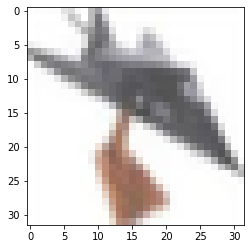

In [6]:
plt.imshow(x_test[215])

In [7]:
cifar10_model=tf.keras.models.Sequential()

2021-07-04 18:55:44.330594: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-04 18:55:44.343569: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-04 18:55:44.343612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (752997a051fa): /proc/driver/nvidia/version does not exist


In [8]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [9]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [10]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [11]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [12]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [13]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [14]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [15]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [16]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [17]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [19]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [20]:
cifar10_model.fit(x_train,y_train,epochs=1)

2021-07-04 18:55:45.182567: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-04 18:55:45.183544: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299995000 Hz


1563/1563 [==============================] - 263s 168ms/step - loss: 1.3788 - sparse_categorical_accuracy: 0.5021


In [21]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 41ms/step - loss: 1.0587 - sparse_categorical_accuracy: 0.6194


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6194000244140625


In [23]:
tf.keras.models.save_model(cifar10_model, 'my_model2.hdf5')


In [24]:
!pip uninstall ipykernel
!pip install ipykernel==4.10

!pip uninstall ipython
!pip install ipython==5.5.0

Uninstalling ipykernel-6.0.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/ipykernel-6.0.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/ipykernel/*
    /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py
    /usr/local/share/jupyter/kernels/python3/kernel.json
    /usr/local/share/jupyter/kernels/python3/logo-32x32.png
    /usr/local/share/jupyter/kernels/python3/logo-64x64.png
Proceed (y/n)? Y
  Successfully uninstalled ipykernel-6.0.1
  Using cached https://files.pythonhosted.org/packages/22/5e/69b0ae84e0cd7c8d4467e0a7b390c560d8c7642493329b15461b41e20fcc/ipykernel-4.10.0-py3-none-any.whl
ERROR: pydeck 0.6.2 has requirement ipykernel>=5.1.2; python_version >= "3.4", but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is i

Uninstalling ipython-7.25.0:
  Would remove:
    /usr/local/bin/iptest
    /usr/local/bin/iptest3
    /usr/local/bin/ipython
    /usr/local/bin/ipython3
    /usr/local/lib/python3.7/dist-packages/IPython/*
    /usr/local/lib/python3.7/dist-packages/ipython-7.25.0.dist-info/*
    /usr/local/share/man/man1/ipython.1.gz
Proceed (y/n)? Y
  Successfully uninstalled ipython-7.25.0
  Using cached https://files.pythonhosted.org/packages/07/63/c987612bcf82c56eaacaf6bf01e31e53a244a0a3a0fb036ec5adc377e0fe/ipython-5.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/64/27/5fd61a451d086ad4aa806dc72fe1383d2bc0e74323668672287f616d5d51/prompt_toolkit-1.0.18-py3-none-any.whl
  Found existing installation: prompt-toolkit 3.0.19
    Uninstalling prompt-toolkit-3.0.19:
      Successfully uninstalled prompt-toolkit-3.0.19


In [25]:
!pip install streamlit

  Using cached https://files.pythonhosted.org/packages/b6/4a/b9e7d67637549e1b75c2946e93e35740ea63a521d7d455343e6a8a8a7b91/ipykernel-6.0.1-py3-none-any.whl
ERROR: ipykernel 6.0.1 has requirement ipython>=7.23.1, but you'll have ipython 5.5.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
  Found existing installation: ipykernel 4.10.0
    Uninstalling ipykernel-4.10.0:
      Successfully uninstalled ipykernel-4.10.0


In [26]:
!pip install pyngrok==4.1.1

In [27]:

%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # cifar-10-image-classification app
         """
         )


file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (180,180)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.py


In [28]:
!streamlit run app.py &>/dev/null&

In [29]:
from pyngrok import ngrok

In [30]:
url = ngrok.connect(port = '8501')

print(url)

http://70153af60d13.ngrok.io
